# Run down of project

In 'Implementing an Ensemble Convolutional Neural Network on Sentinel-1 Synthetic Aperture Radar data and Sentinel-3 Radiometric data for the detecting of forest fires', a possible ECNN framework is shown. This report describes the needed theory as well as choices taken. Different Python libraies have been made to support the report and different notebooks have been constructed to support these.

This notebook aims to give a brief summary of the different steps as perfomed in Python.

---------------------------
1) First, this notebook will illustrate how the location and time the Ljusdal fire was obtained.

2) Then, these fires will be turned into footprints.

3) A footprint is then used to download a sentinel-1 image.

4) It is then assumed that the user have pre-processed this image in ESA SNAP.

5) Then, the images will be loaded, and areas for fire and no_fire will be defined manually.

6) These areas are then saved as images.

7) Images are then labelled.

8) Model 1, 2, 3, 4 and 5 will then be made (and hence the ECNN).

9) Each model will then be trained (here badly with only 1 epoch as proof of concept.) 
This is done in colab for computational reasons, but also due to the librariy problems.

10) The trained model will then be used to detect fire in an image.
This is done in colab for computational reasons, but also due to the librariy problems.




For more information on the individual steps, see the suggested notebooks or read the report.

----------------------

Loading the developed libraries. 

In [3]:
import sys
sys.path.append('C:\\Users\\krist\\Documents\\Syntese\\code')
sys.path.append('C:\\Users\\krist\\Documents\\Syntese\\data\\s1')

import my_s1 as s1
import my_s3 as s3
import my_modis as modis
import my_tools as tools
import my_cnn as cnn

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import geopandas as gpd

Using TensorFlow backend.


## 1) Find out where the 'big' fires are, by downloding e.g. MODIS data
see the modis_implementaiotion.ipynb notebook.


there are: 4  . shp  files in folder


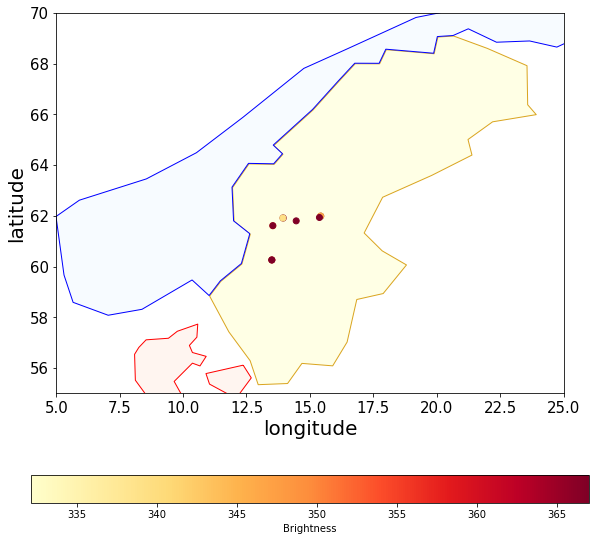

In [4]:
Path = 'C:\\Users\\krist\\Documents\\Syntese\\data\\modis'
shps = modis.modistoshape(path=Path,verbose=1,file_type='shp')
data_FIRMS = gpd.read_file(shps[3])
biggest_firest = data_FIRMS[(data_FIRMS.BRIGHT_TI4>330) & (data_FIRMS.FRP>150)]
modis.plotfire_shp(biggest_firest,'Fires in Sweden, May thorugh August, big fires')

## 2) Make footprints fromt the above shown fires.
see the modis_implementaiotion.ipynb notebook.

In [5]:
#geojson_to_wkt(read_geojson('geojson/MODIS_2018-07-19_63.5833_17.8365.geojson'))
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
#a = geojson_to_wkt(read_geojson(''code/notebooks/cnn/geojson/MODIS_2018-05-28_66.341_21.8456.geojson'C:\\Users\\krist\\Documents\\Syntese\\code\\notebooks\\ljundal.geojson'))

In [7]:
footprints = modis.get_fires(shps[2],verbose=1)

------------------------------
(get_fires): Changing directory to C:\Users\krist\Documents\syntese\code\notebooks\cnn/geojson
------------------------------
1 (get_fires): file MODIS_2018-05-28_66.3463_21.8257.geojson already exists
2 (get_fires): file MODIS_2018-05-28_66.341_21.8456.geojson already exists
3 (get_fires): file MODIS_2018-05-28_66.3368_21.8231.geojson already exists
4 (get_fires): file MODIS_2018-06-11_64.6733_17.7695.geojson already exists
5 (get_fires): file MODIS_2018-06-11_64.6788_17.7475.geojson already exists
6 (get_fires): file MODIS_2018-07-01_60.2588_13.5095.geojson already exists
7 (get_fires): file MODIS_2018-07-01_60.2517_13.4941.geojson already exists
8 (get_fires): file MODIS_2018-07-01_60.254_13.5129.geojson already exists
9 (get_fires): file MODIS_2018-07-16_61.787_14.4836.geojson already exists
10 (get_fires): file MODIS_2018-07-16_61.7777_14.4877.geojson already exists
11 (get_fires): file MODIS_2018-07-16_61.7816_14.4953.geojson already exists
12 (get_

## 3) Download data using online service or s1.download_sentinel1() 


In [8]:
s1.download_sentinel1(footprint='geojson/MODIS_2018-05-28_66.341_21.8456.geojson',folder = 'C:\\Users\\krist\\Documents\\Syntese\\data\\s1\\download', username='xxx',password= 'xxx',date_start=['01','06','2020'],date_end=['02','06','2020'])

1  Products are found.


Downloading: 100%|█████████████████████████████████████████████████████████████████| 1.03G/1.03G [17:53<00:00, 958kB/s]
MD5 checksumming: 100%|████████████████████████████████████████████████████████████| 1.03G/1.03G [00:02<00:00, 470MB/s]


## 4) defining my own areas.
Here, it is done manually since it would take longer take to make a function that it does making coordinates.

See the sentinel_1_analysis.ipynb notebook and the sentinel_3_analysis.ipynb for an analysis of the area.

The the create_dataset.ipynb notebook for informaiton on creating the dataset.

In [5]:
folder_path = "C:\\Users\\krist\\Documents\\Syntese\\data\Hand_in\\files_from_images\\image_pair_3"

img_paths = tools.file_paths(folder_path,verbose=1,file_type='tif')
print(*(i for i in img_paths), sep='\n')

s1_img,s1_raster,s1_extend, s1_names, s1_extra = s1.get_img([img_paths[0]],data_type='ENVI')
s3_img,s3_raster,s3_extend, s3_names, s3_extra = s3.get_img([img_paths[1]],data_type='ENVI',verbose=0)


there are: 2  . tif  files in folder
C:\Users\krist\Documents\Syntese\data\Hand_in\files_from_images\image_pair_3\s1_collocated.tif
C:\Users\krist\Documents\Syntese\data\Hand_in\files_from_images\image_pair_3\s3_collocated.tif
--------------------------
Sentinel-1 image is loading

1 image is being loaded
image 1
There are 2 bands


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


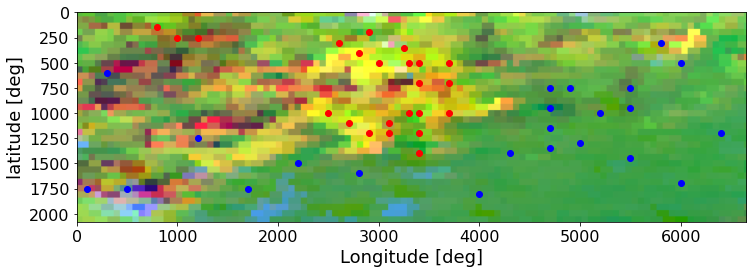

In [6]:
nadir_false_colour_RGB = tools.color_img(tools.img_stretch(s3_img[0],0,255),tools.img_stretch(s3_img[1],0,255),tools.img_stretch(s3_img[2],0,255))
fig, axs = plt.subplots(figsize=(12,6), facecolor='w', edgecolor='k') 
axs.imshow(nadir_false_colour_RGB)
plt.xlabel('Longitude [deg]', fontsize=18)
plt.ylabel('latitude [deg]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#fire
plt.scatter(3100,1100,c='r')
plt.scatter(3400,700,c='r')
plt.scatter(3400,1200,c='r')
plt.scatter(2500,1000,c='r')
plt.scatter(3400,1400,c='r')
plt.scatter(3000,500,c='r')
plt.scatter(2800,400,c='r')
plt.scatter(3700,700,c='r')
plt.scatter(2600,300,c='r')
plt.scatter(1000,250,c='r')
plt.scatter(1200,250,c='r')

#no fire
plt.scatter(4000,1800,c='b')
plt.scatter(1200,1250,c='b')
plt.scatter(4700,750,c='b')
plt.scatter(2800,1600,c='b')
plt.scatter(4300,1400,c='b')
plt.scatter(5000,1300,c='b')
plt.scatter(300,600,c='b')
plt.scatter(2200,1500,c='b')
plt.scatter(5200,1000,c='b')
plt.scatter(6000,500,c='b')
plt.scatter(6000,1700,c='b')
#defining each scatter as done above is super ineffecient, but whatever. It worked for so few points.

plt.scatter(4900,750,c='b')
plt.scatter(4700,950,c='b')
plt.scatter(4700,1150,c='b')
plt.scatter(4700,1350,c='b')
plt.scatter(5500,750,c='b')
plt.scatter(5500,950,c='b')
plt.scatter(5500,1450,c='b')
plt.scatter(500,1750,c='b')
plt.scatter(100,1750,c='b')
plt.scatter(5800,300,c='b')
plt.scatter(1700,1750,c='b')
plt.scatter(6400,1200,c='b')


plt.scatter(3300,1000,c='r')
plt.scatter(3300,500,c='r')
plt.scatter(3400,1000,c='r')
plt.scatter(3400,500,c='r')
plt.scatter(3700,500,c='r')
plt.scatter(3700,1000,c='r')
plt.scatter(2900,200,c='r')
plt.scatter(2900,1200,c='r')
plt.scatter(2700,1100,c='r')
plt.scatter(800,150,c='r')
plt.scatter(3250,350,c='r')
plt.scatter(3100,1200,c='r')
plt.show()


#just defining in a list now..
fire_coord=[]
fire_coord.append([1000,1200,3000,3200])
#fire_coord.append([600,800,3200,2600])
fire_coord.append([1100,1300,3300,3500])
fire_coord.append([900,1100,2400,2600])
fire_coord.append([1300,1500,3300,3500])
fire_coord.append([500,700,2900,3100])
fire_coord.append([400,600,2700,2900])
fire_coord.append([300,500,2700,2900])
fire_coord.append([600,800,3600,3800])
fire_coord.append([200,400,2500,2700])
fire_coord.append([150,350,1100,1300])
fire_coord.append([150,350,1300,1500])
fire_coord.append([900,1100,3200,3400])
fire_coord.append([400,600,3200,3400])
fire_coord.append([900,1100,3300,3500])
fire_coord.append([400,600,3300,3500])
fire_coord.append([400,600,3600,3800])
fire_coord.append([900,1100,3600,3800])
fire_coord.append([100,300,2800,3000])
fire_coord.append([1100,1300,2800,3000])
fire_coord.append([1000,1200,2600,2800])
fire_coord.append([50,250,700,900])
fire_coord.append([250,450,3150,3350])
fire_coord.append([1100,1300,1100,1300])

no_fire_coord=[]
no_fire_coord.append([1700,1900,3900,4100])
no_fire_coord.append([1150,1350,1100,1300])
no_fire_coord.append([650,850,4600,4800])
no_fire_coord.append([1500,1700,2700,2900])
no_fire_coord.append([1300,1500,4200,4400])
no_fire_coord.append([1200,1400,4900,5100])
no_fire_coord.append([500,700,200,400])
no_fire_coord.append([1400,1600,2100,2300])
no_fire_coord.append([900,1100,5100,5300])
no_fire_coord.append([400,600,5900,6100])
no_fire_coord.append([1600,1800,5900,6100])
no_fire_coord.append([650,850,4800,5000])
no_fire_coord.append([850,1050,4600,4800])
no_fire_coord.append([1050,1250,4600,4800])
no_fire_coord.append([1250,1450,4600,4800])
no_fire_coord.append([650,850,5400,5600])
no_fire_coord.append([850,1050,5400,5600])
no_fire_coord.append([1350,1550,5400,5600])
no_fire_coord.append([1650,1850,0,200])
no_fire_coord.append([200,400,5700,5900])
no_fire_coord.append([1650,1850,1600,1800])
no_fire_coord.append([1100,1300,6300,6500])

## 5) Turn fire and no_fire areas into usable arrays and save
placed in correct folders.

In [7]:
training_data_folder = 'C:\\Users\krist\\Documents\\Syntese\\data\\data_training'
fire_box_s1,no_fire_box_s1,fire_box_s3,no_fire_box_s3 = cnn.make_trainig_areas(fire_coord,no_fire_coord,s1_img,s3_img)
print('Number of Sentinel-3 Fire areas',len(fire_box_s3),'\nNumber of Sentinel-1 Fire areas',len(fire_box_s1),'\nEach Sentinel-3 image has the size of ',fire_box_s3[0].shape,'\nAnd each Sentinel-1 image has the size of ',fire_box_s1[0].shape)
print('\n------------------\nNumber of Sentinel-3 no_Fire areas',len(fire_box_s3),'\nNumber of Sentinel-1 no_Fire areas',len(fire_box_s1),'\nEach Sentinel-3 image has the size of ',fire_box_s3[0].shape,'\nAnd each Sentinel-1 image has the size of ',fire_box_s1[0].shape)
tools.satf([fire_box_s1,no_fire_box_s1,fire_box_s3,no_fire_box_s3],name='d23',data_folder=training_data_folder,ext=".jpg")

Number of Sentinel-3 Fire areas 23 
Number of Sentinel-1 Fire areas 23 
Each Sentinel-3 image has the size of  (200, 200, 5) 
And each Sentinel-1 image has the size of  (200, 200, 2)

------------------
Number of Sentinel-3 no_Fire areas 23 
Number of Sentinel-1 no_Fire areas 23 
Each Sentinel-3 image has the size of  (200, 200, 5) 
And each Sentinel-1 image has the size of  (200, 200, 2)
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists

## 6) Labelling and making usable for CNN

see the use_dataset.ipynb notebook

In [8]:
import os
print(os.listdir(training_data_folder))
print(os.listdir(training_data_folder+'/'+os.listdir(training_data_folder)[0]))

['13', '46', '79', 'vh', 'vv']
['fire', 'no_fire']


In [9]:
s1_vh,s1_vv,s3_13,s3_46,s3_79 = cnn.make_dataset(data_folder=training_data_folder,split=0.2,verbose=1)

Making training set
Found 45 files belonging to 2 classes.
Using 9 files for validation.
Found 45 files belonging to 2 classes.
Using 36 files for training.
Found 45 files belonging to 2 classes.
Using 9 files for validation.
Found 45 files belonging to 2 classes.
Using 36 files for training.
Found 45 files belonging to 2 classes.
Using 9 files for validation.
Found 45 files belonging to 2 classes.
Using 36 files for training.
Found 45 files belonging to 2 classes.
Using 9 files for validation.
Found 45 files belonging to 2 classes.
Using 36 files for training.
Found 45 files belonging to 2 classes.
Using 9 files for validation.
Found 45 files belonging to 2 classes.
Using 36 files for training.


## 7) Make models 

see the XXXX.ipynb notebook

In [10]:
#making model1, 2, 3, 4 and model 5 using functions s1_cnn_model() and s3_model().
model1 = cnn.s1_model((200,200) + (1,),Name='model1',dropout=0.3,regularisation=0.5,filter_size=17,stride=17)
model2 =  cnn.s1_model((200,200) + (1,),Name='model2',dropout=0.3,regularisation=0.5,filter_size=17,stride=17)
model3 = cnn.s3_model((200,200) + (3,),Name='model3',dropout=0.3,regularisation=0.5,filter_size=12,stride=12)
model4 = cnn.s3_model((200,200) + (3,),Name='model4',dropout=0.3,regularisation=0.5,filter_size=12,stride=12)
model5 = cnn.s3_model((200,200) + (3,),Name='model5',dropout=0.3,regularisation=0.5,filter_size=12,stride=12)

We can show the arcitecture of e.g. model 1 or model 3

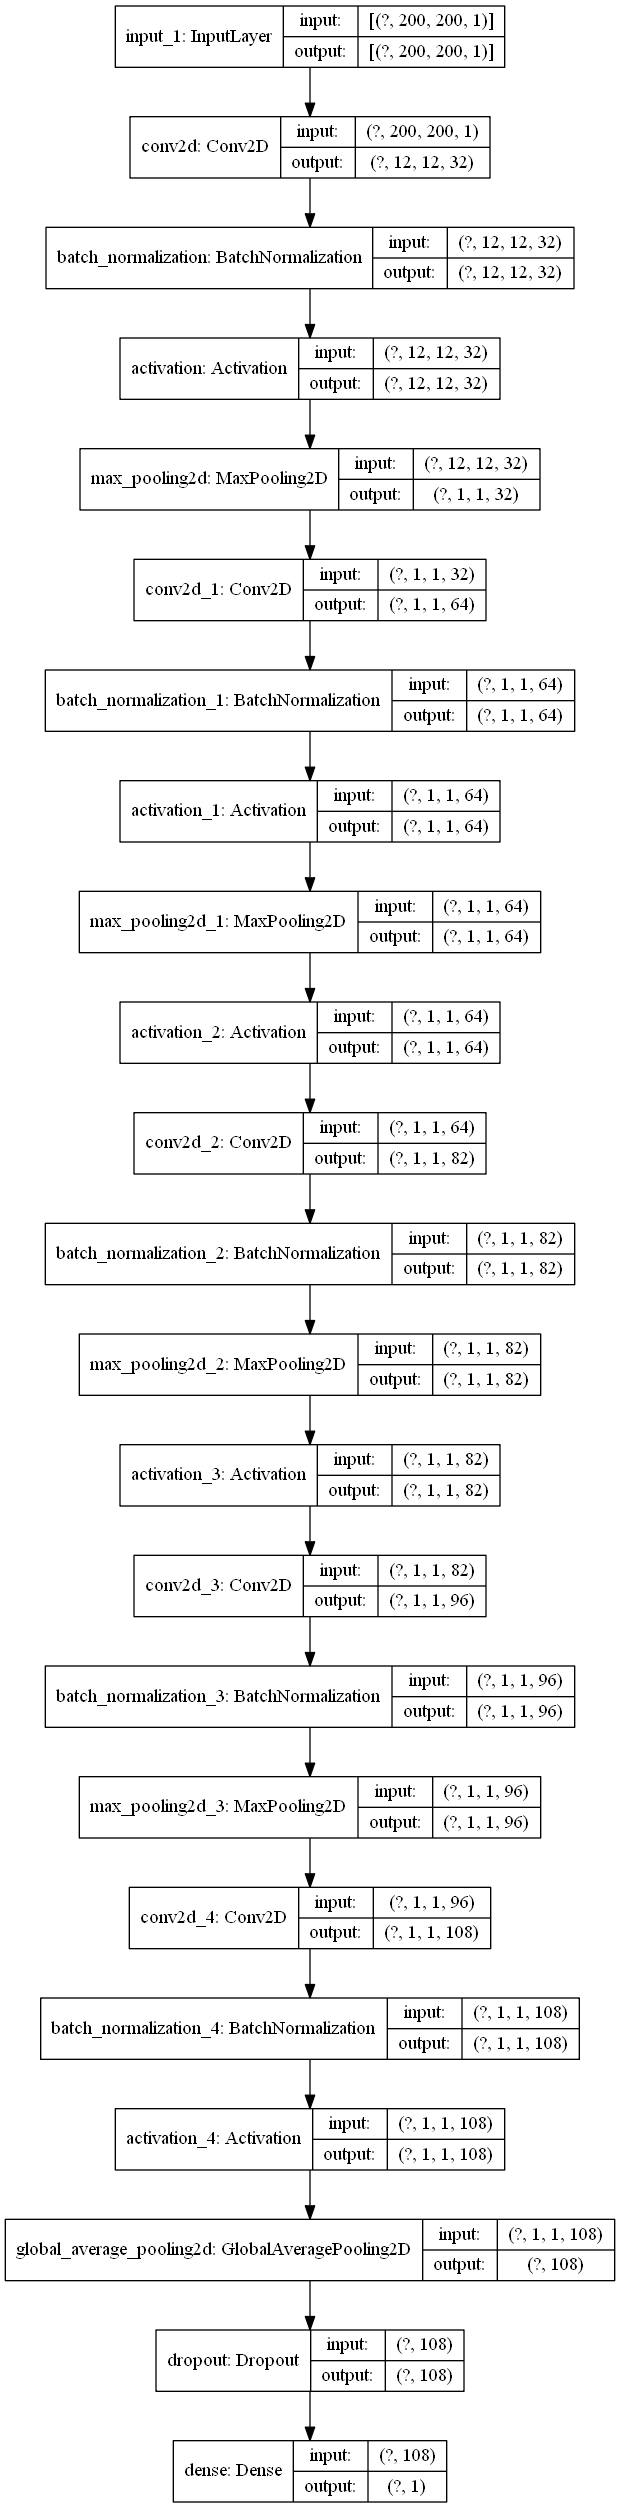

In [11]:
from tensorflow import keras
keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=True)
keras.utils.plot_model(model3, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=True)

# The training and utilization of the model will be performed in Colab, due to the GPU acceleration.

## 8) Training models

see Colab

## 9) use model

see Colab